>> #   **PRCP-1000-PortugeseBank**

##  Problem Statement

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010.

## 2. Objective
- The Objective is to predict whether a customer will subscribe to term deposit(y)

## Task -1 Complete Data Analysis Reprot

### 1. Importing Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

### 2.Data Collection and Analysis

#### 2.1. Data collect

In [2]:
df = pd.read_csv(r"C:\Users\DELL 5410\Downloads\PRCP-1000-ProtugeseBank\Data\bank-additional\bank-additional-full.csv",sep=';')

#### 2.2. Understand Data

In [3]:
print(df.shape)

(41188, 21)


In [4]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


#### 2.3 Identifing Numeric and Categoric columns

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Insights
- The dataset contains 41188 observations and 21 features.
- The dataset includes demographic information, financial and loan-related attributes, campaign interaction history, and macroeconomic indicators that influence customer investment behavior.  

#### 2.4 Check duplicate and null values

In [6]:
# check null values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [7]:
#check duplicate values
print(df.duplicated().sum())

12


#### Insights 
- Dataset contain duplicate values, so we will drop them.
- Dataset does not cantain any missing values.
- However several categorical varibles include 'unknown', which is treated as valid category.

In [8]:
df.drop_duplicates(inplace=True)

#### 2.5. Target Variable Analysis

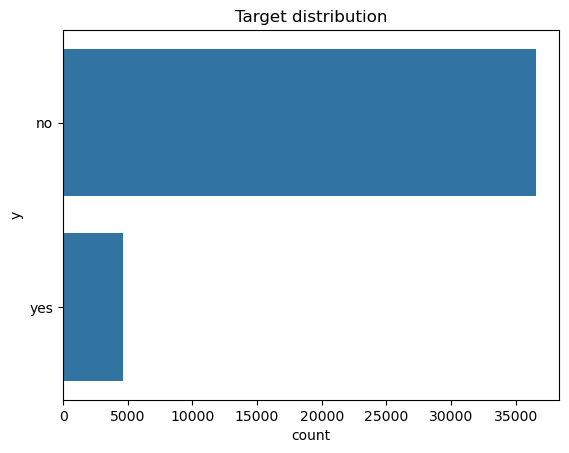

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

In [9]:
sns.countplot(df['y'])
plt.title('Target distribution')
plt.savefig("Outputs/Target_variable_analysis.png")
plt.show()
df['y'].value_counts(normalize=True)

#### Insights
- Dataset is highly imbalanced
- ~89% no and ~11% yes

## 3. Exploaratory Data Analysis

### 3.1 Bank client data analysis

#### 3.1.1 Age vs Subscription

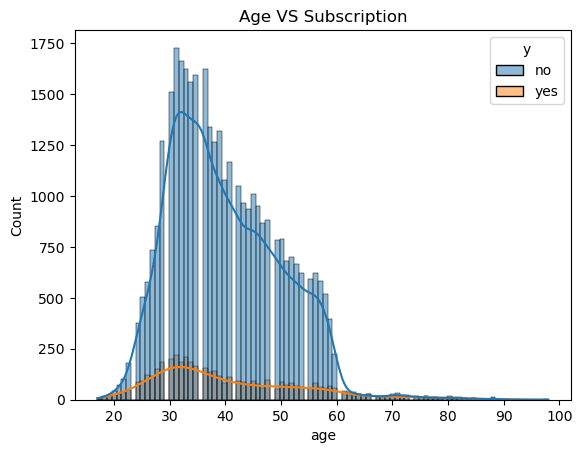

In [10]:
sns.histplot(x=df.age,hue=df.y, kde=True)
plt.title('Age VS Subscription')
plt.savefig("Outputs/Age_vs_subsctiption.png")
plt.show()

##### Insights 
- The 30-40 age group shows more subscription rate compared to other age groups.
- Younger age group who are below age 25 shows lower subscription rate, possible reason could be lower income, less financial commitments.
- Older age group who are above age 60 also shows lower subsciription rate, This may due to retiremnt and less need for long-term financial needs.
##### Business Insights
- The 30-40 age group represent high potential target segment for marketing compaigns.
- Targeted offer and personalized messaging could imporve conversion rate in this segment

#### 3.1.2 Job vs Subscription

Job (given)  
job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

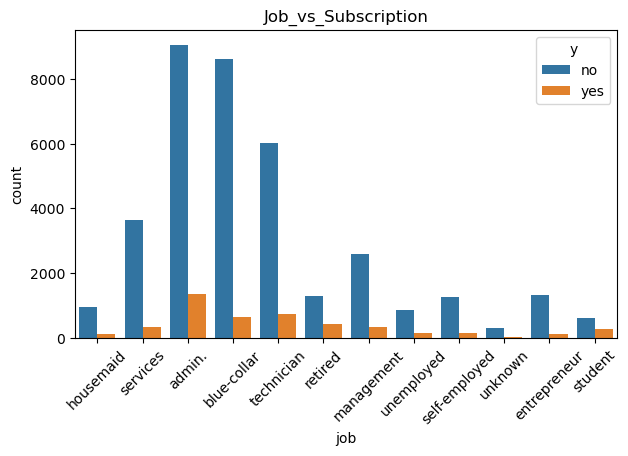

In [11]:
plt.figure(figsize=(7,4))
sns.countplot(x=df.job,hue=df.y)
plt.xticks(rotation=45)
plt.title('Job_vs_Subscription')
plt.savefig("Outputs/job_vs_subscription.png")
plt.show()

#### Insghts
- People who are in the job **admin, blue-collar, technician** have higher subscription rate compared to other job holders
- **Student** population is small but it shows some positive responses.
- **Retired** customers show a moderate subscription level, possibly due to interest in low-risk financial products.
- Housemaid, unemployed, self-employed, and unknown categories show very low subscription counts.
#### Business Insights
- Customers working in **Admin, Techician** roles are more likely to subscribe, making them ideal targets for marketing compaign.
- **Blue-collar** customers, high in number, show lower conversation and may need persolized offers.
- Low response groups(housemaid, unempoyed, unkown) shoulb targeted selectively to reduce the compaign costs.
- Focusing on High potential segments can improve compaign efficiancy and reduce costs.

#### 3.1.3 Marital vs Subscription

Marrital(given)  
marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

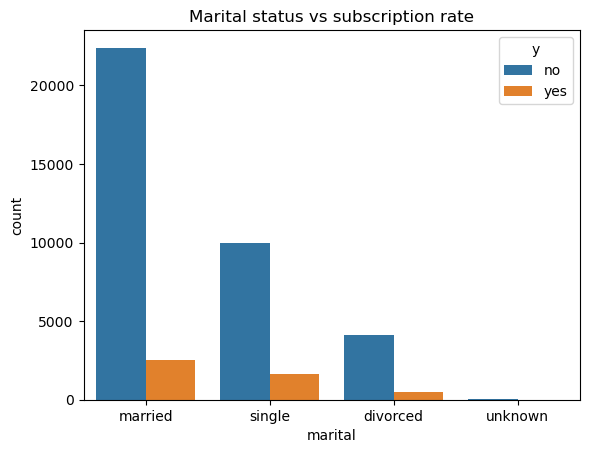

In [12]:
sns.countplot(x=df['marital'],hue=df.y)
plt.title('Marital status vs subscription rate')
plt.show()

##### Observation
- Customers who are married are in largest, single are in moderate and diverced are less group in the dataset.
- subscription are  also in the same order
##### Business Insights
- Single customers have highere subscription rate compare to married and divorced customers
- Although married customers form the majority, single customers are relatively more responsive to marketing campaigns and should be prioritized for targeting.

#### 3.1.4 Education Vs Subscription

education(given)  
education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

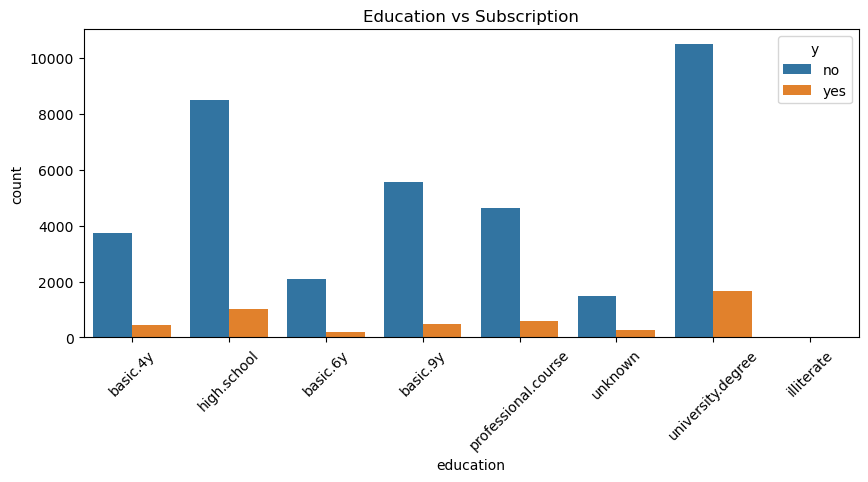

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['education'], hue = df.y)
plt.title('Education vs Subscription')
plt.xticks(rotation=45)
plt.savefig('Outputs/ecuation_vs_subscribe.png')
plt.show()

##### Observation
- Most customers are belongs to **High.school** and **university.degreee** education categories
- The number of subscription increses with the increation the level of education
- Customer with basic education show lower subscription rate
##### Business Insights
- Customer with **higher education(university.degree, professionl.course)** are more likely to subscribe to the term deposit
- Marketing compaign can be more effective when **targetting well-educated customers**, as they respond to better financial products
- For customers with lower education levels , simpler conversion and awareness-based compaigns may improve conversation

#### 3.1.5 default vs Subscription

default(given)  
has credit in default? (categorical: 'no','yes','unknown')
- A customer failed to repay a loan or credit on time as per the agreed terms.

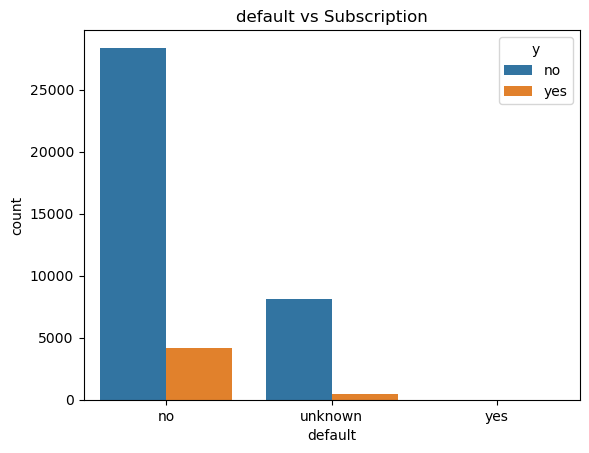

In [14]:
sns.countplot(x=df['default'],hue=df['y'])
plt.title('default vs Subscription')
plt.show()

##### Observation
- Customers who has no credit default largest group in dataset and has the high subscription rate.
- Customer who has credit deafault very small and almost never subscribe
- Customers with default is unknown shows lower subscription
##### Business insights
- Customers with no default history are the primary potential buyers
- Customers with default history are extremely unlikely to subscribe to the term deposit, and should avoid targetting in marketing compaign.

#### 3.1.6 Housing vs Subscription

housing(given)  
housing: has housing loan? (categorical: 'no','yes','unknown')

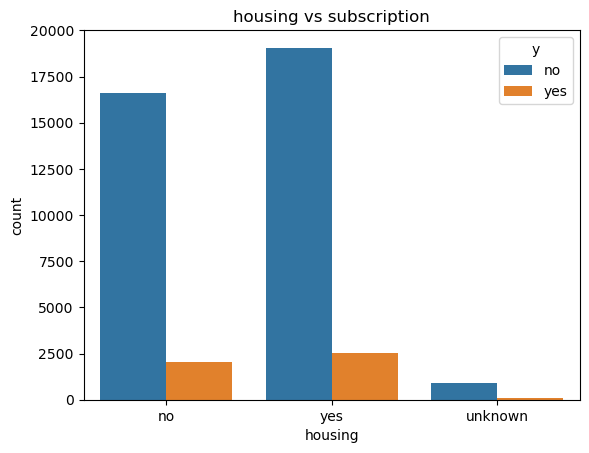

In [15]:
sns.countplot(x=df['housing'],hue=df['y'])
plt.title('housing vs subscription')
plt.show()

##### Observation
- Most of the customers have house loans, followed by without housing loan, while few fall under the unknown category.
- Customer with house loan shows slightly higher subscription, mainly due to their larger presence in the dataset.
##### Business insights
- Customers without housing loans are slighlty more likely to subscribe compared to those with loans.
- Customer with house loans already have financial commitments, which may reduce their willingness to invest.
- Customer with unknown housing status contribute very little and are not a priority segment

#### 3.1.7 loan vs Subscription

loan(given)  
loan: has personal loan? (categorical: 'no','yes','unknown')

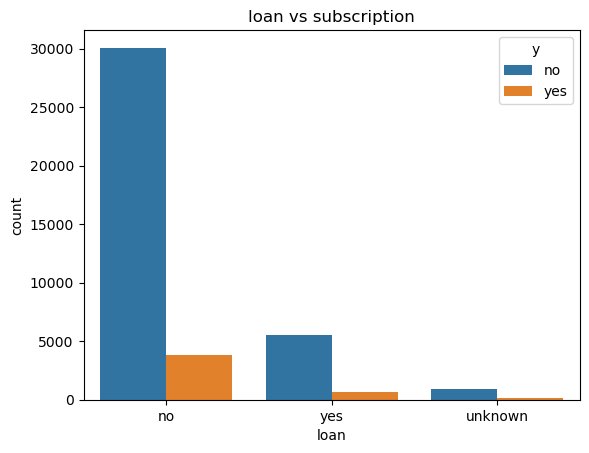

In [16]:
sns.countplot(x=df['loan'],hue=df['y'])
plt.title('loan vs subscription')
plt.show()

##### Observation
- Most of the customers do not have a personal loan.
- A smaller number have a personal loan, and very few fall under the unknown category.
##### Busniess category
- Customer without personal loan are more likely to subscribe to the term deposit.
- Customers with personal loans may have higher financial obligations, which can reduce their interest in new investments.

### 3.2 Last contacts analysis

#### 3.2.1 contact vs subscription

contact(given)  
contact: contact communication type (categorical: 'cellular','telephone')

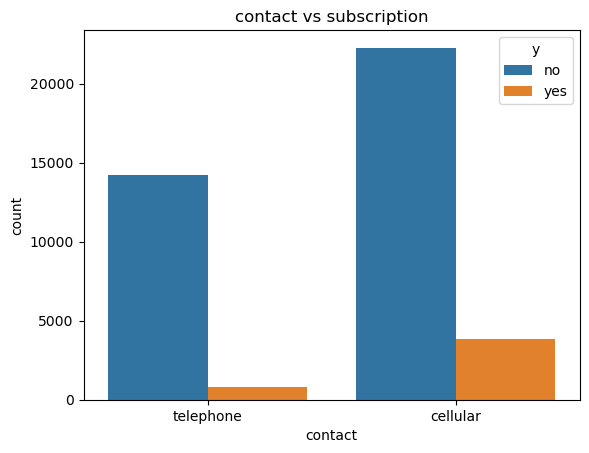

In [17]:
sns.countplot(x=df['contact'],hue=df['y'])
plt.title('contact vs subscription')
plt.show()

##### Observation
- Most customer contacts were made via cellular rather than telephone
- The number of successful subscriptions is significantly higher for cellular contancts compared telephone.
##### Business insights
- Cellular contacts are more effictive for marking term deposit than telephone calls.
- The bank shoul prioratized cellular-based compaigns to improve subscription conversioin rate.

### 3.2.2 month vs Subscription

Month(given)  
last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- **Since the dataset does not contain a full date, month is treated as a categorical feature rather than a datetime variable.**

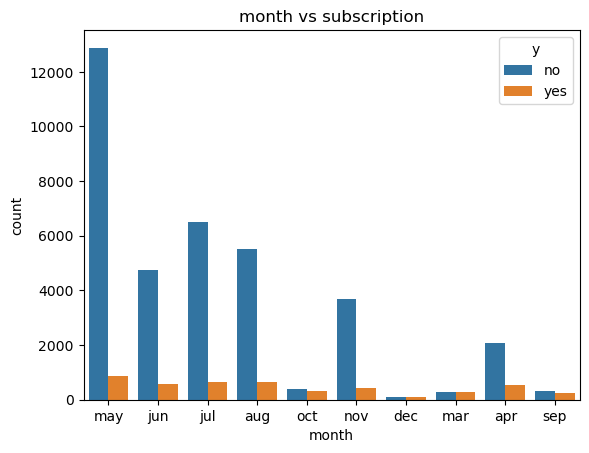

In [18]:
sns.countplot(x=df['month'],hue=df['y'])
plt.title('month vs subscription')
plt.show()

##### Observation
- Most Customer contacts occured during **may,june,jul and aug**
- Subscriptions are higher in **march, april, september, and october** compared to other months
##### Business insights
- Timing of campaigns strongly impacts subscription success, not just the number of calls.
- The bank can optimize campaign scheduling by focusing more on high-conversion months like March, April, September, and October.

#### 3.2.3 day_of_week vs subscription

day_of_week(given)  
last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

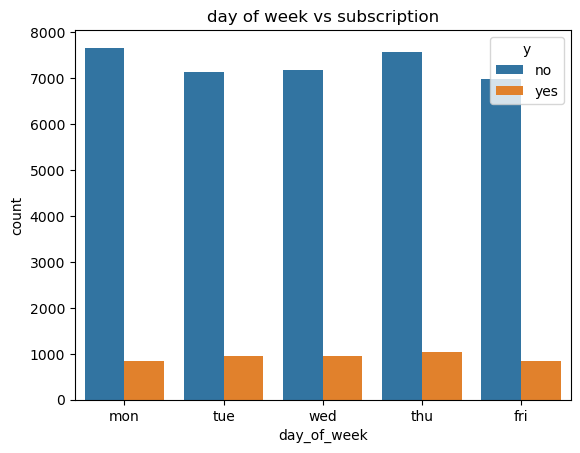

In [19]:
sns.countplot(x=df['day_of_week'],hue=df['y'])
plt.title('day of week vs subscription')
plt.show()

##### Observation
- Customer contacts are fairly evenly distributed across all weekdays.
- Thursday shows a slightly higher number of successful subscriptions compared to other days.
##### Business insights
- Day of the week has a minor impact on subscription outcome.
- Campaigns can be run on any weekday, but Thursday may be slightly more effective for better conversions.

### 3.2.4 Duration vs Subscription

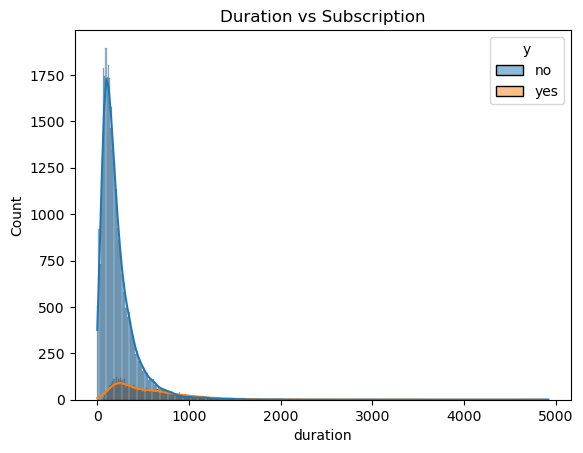

In [20]:
sns.histplot(x=df.duration, hue = df.y, kde=True)
plt.title('Duration vs Subscription')
plt.savefig("Outputs/Duration_vs_subscription.png")
plt.show()

##### Observation
- Most calls are short, customer who didn't subscribe mostly have short call duration.
- very few calls are very long, customers who subscribed generally have longer duration.
- **Duration = 0** almost always leads to **y = 0**, this is the redflag for data leakage.
##### Business insights
- Customer who stay longer on the call are more likely to subscribe to the term deposit.
- Very short calls almost always result in no suscription rate, indicating low subscription rate.
- This suggests that engaging conversion and customer interest during call plays key role in successful conversations.

### 3.3 Other attribute analysis

### 3.3.1 Campaign vs Subsciption rate

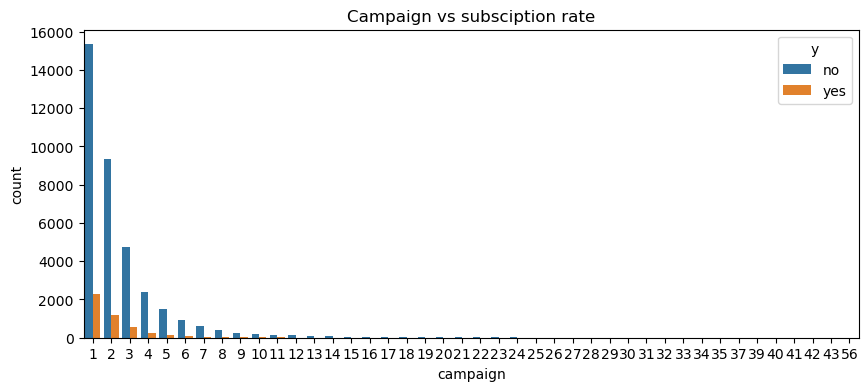

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['campaign'], hue = df.y)
plt.title('Campaign vs subsciption rate')
plt.savefig("Outputs/campaign_vs_subscription.png")
plt.show()

##### Observation
- Most customers were cantacted 1 to 3 times during the compaign
- As the number of contacts increases, the number of subscription deacreases sharply.
##### Business insights
- **Early conatact attempts are the most affective in converting customers.**
- Reated followup calls leads to lower success rate, possibly due to customer irritation or lack of interest.
- Optimizing compaigns by limiting the number of calls per customer can reduce cost and improve overall conversion efficiency

#### 3.3.2 pdays vs Subscription

pdays(Given):  
Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

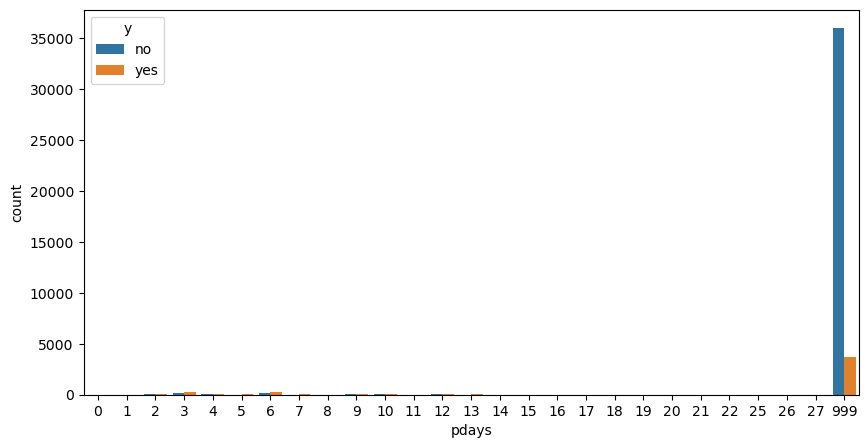

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['pdays'],hue=df.y)
plt.show()

##### Insights 
- **Most of the values are pdasy = 999, which means, customers were not contacred earlier.**
- Very few customers were contacted earlier
- This feature is higly skewed, not hard to interpret
##### Business Insights
- **Previously contacted customers have a higher subscription probability.**
- This feature helps the bank focus on warm leads, improving campaign efficiency.
- Simplfying pdays into binary variable can also imporve model performance

#### 3.3.4 Previous vs Subscription

previous(given):  
Number of contacts performed before this campaign and for this client (numeric)

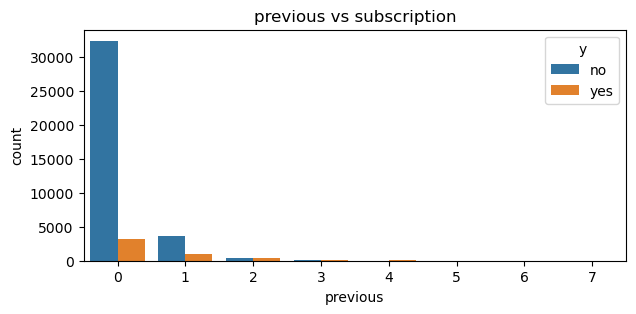

In [23]:
plt.figure(figsize=(7,3))
sns.countplot(x=df['previous'],hue=df['y'])
plt.title('previous vs subscription')
plt.show()

##### Observation
- Most customers were contacted 0 times before this campaign.
- As number of previous contacts increases, number of customers decreases.
- Customer with atleast 1 previous contact show a higher proportion of subscription
##### Business insights
- First time contacted customers rarely subscribe compared to repeat contacts
- Follow-up campaigns are more effective, as prior interaction increases the chance of subcription

#### 3.3.5 Poutcome vs Subscription

poutcome(given):  
outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
- success → Client subscribed in the previous campaign.
- failure → Client was contacted but did not subscribe. 
- nonexistent → Client was not contacted before

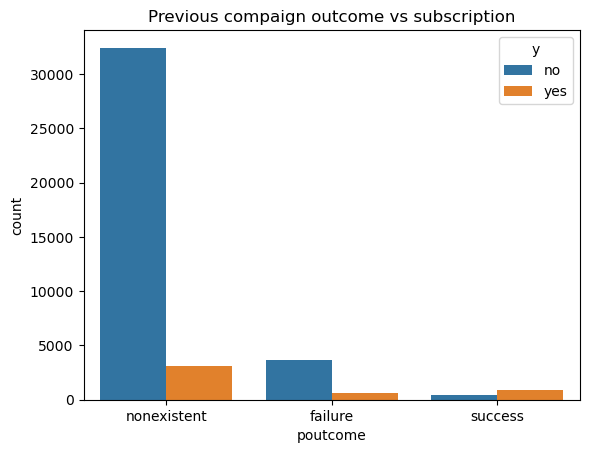

In [24]:
sns.countplot(x = df.poutcome, hue=df.y)
plt.title('Previous compaign outcome vs subscription')
plt.savefig("Outputs/Previous_compaign_outcome_vs_subscription.png")
plt.show()

##### Observation
- Customers with a successful outcome in previous campaigns have a much higher likelihood of subscribing again. Customers with no previous contact form the majority but show a lower subscription rate, while customers with previous failures are least likely to subscribe.
##### Business insights
- Previous campaign success is a strong indicator of customer interest and can be used to prioritize customers in future marketing campaigns.

### 3.3.6 emp.var.rate vs subscription

emp.var.rate(given):  
employment variation rate - quarterly indicator (numeric)

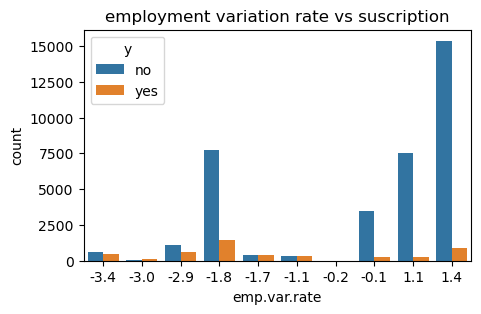

In [25]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['emp.var.rate'],hue=df['y'])
plt.title('employment variation rate vs suscription')
plt.show()

##### Observation
- Most customers belong to a few specific employment variation values (like -1.8, -0.1, 1.1, 1.4).
- When emp.var.rate is negative, the number of subscriptions is generally lower.
- When emp.var.rate is positive (1.1, 1.4), subscriptions increase in absolute count.
##### Business insights
- Customers are more likely to subscribe during strong economic periods (positive employment growth).
- In weak job markets, customers are less willing to commit to financial products.
- Banks should intensify campaigns when employment indicators are positive to maximize conversions.

#### 3.3.7 cons.price.idx vs subscription

cons.conf.idx(given):  
consumer confidence index - monthly indicator (numeric)   
- It shows how confident consumers are about their financial future.

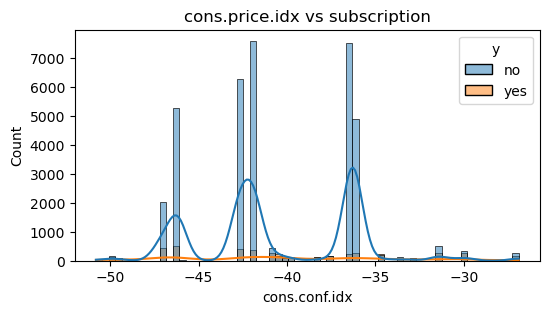

In [26]:
plt.figure(figsize=(6,3))
sns.histplot(x=df['cons.conf.idx'],hue=df['y'],kde=True)
plt.title('cons.price.idx vs subscription')
plt.show()

##### Observation
- Most data points lie between -50 and -30.
- Subscriptions (yes) are slightly higher when index is less negative (around -35 to -30).
- When confidence is very low (around -48), subscriptions are fewer.
##### Business insights
- Customers are more likely to subscribe when consumer confidence is high, as people feel financially secure and are more willing to commit to long-term financial products.

#### 3.3.8. euribor3m VS Subscription rate

euribor3m(given)  
euribor 3 month rate - daily indicator (numeric)

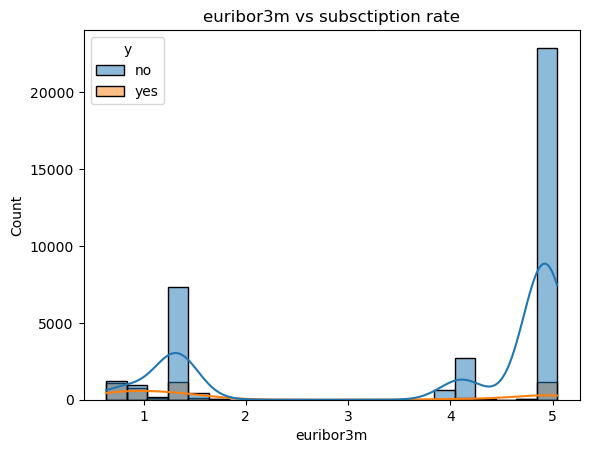

In [27]:
sns.histplot(x=df['euribor3m'], hue=df.y,kde = True)
plt.title("euribor3m vs subsctiption rate")
plt.savefig("Outputs/euribor3m_vs_subsciption")
plt.show()

##### Observation
- Higher euroibor3m values are associated with large number of non-subscriptions
- Subscriptions are more frequent when euroibor3m values are lower
##### Business insights
- When interest rates are low, customers are more likely to subscribe to term deposits.
- When interest rates are high, customers prefer other investment options, so subscriptions decrease.  
- Bank marketing campaigns work better during low-interest periods, as customers are more open to fixed deposit offers.  

### 3.3.9 nr.employed vs y

nr.employed(given)
- number of employees - quarterly indicator (numeric)
- nr.employed represents the total number of employed people in the country (in thousands) for that quarter.

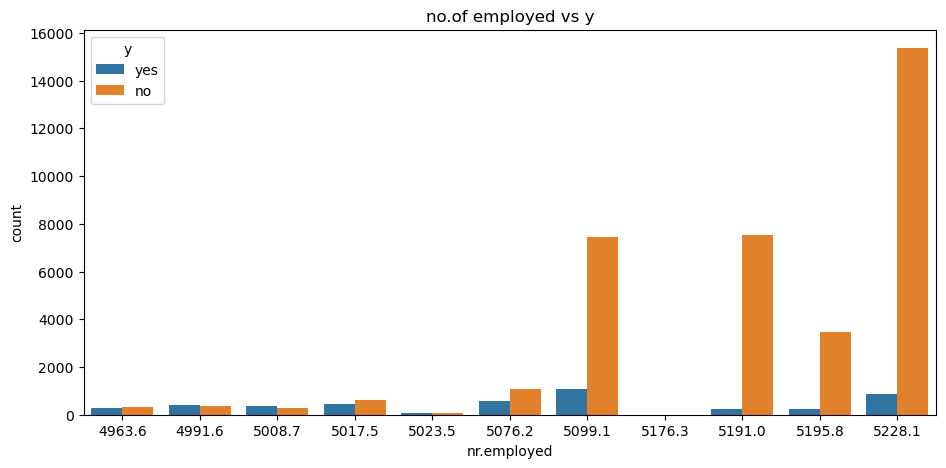

In [28]:
plt.figure(figsize=(11,5))
sns.countplot(x=df['nr.employed'],hue=df['y'])
plt.title('no.of employed vs y')
plt.show()

##### Observation
- The number of employed (nr.employed) takes discrete values, indicating different economic periods.
- Most customers did not subscribe when employment levels were very high.
- Higher subscription counts are observed at lower employment levels.
##### Business Insight
- Macroeconomic conditions influence customer decisions on term deposits.
- During periods of lower employment or economic uncertainty, customers are more likely to opt for safer investments like term deposits.

### 3.4 Feature Correlation

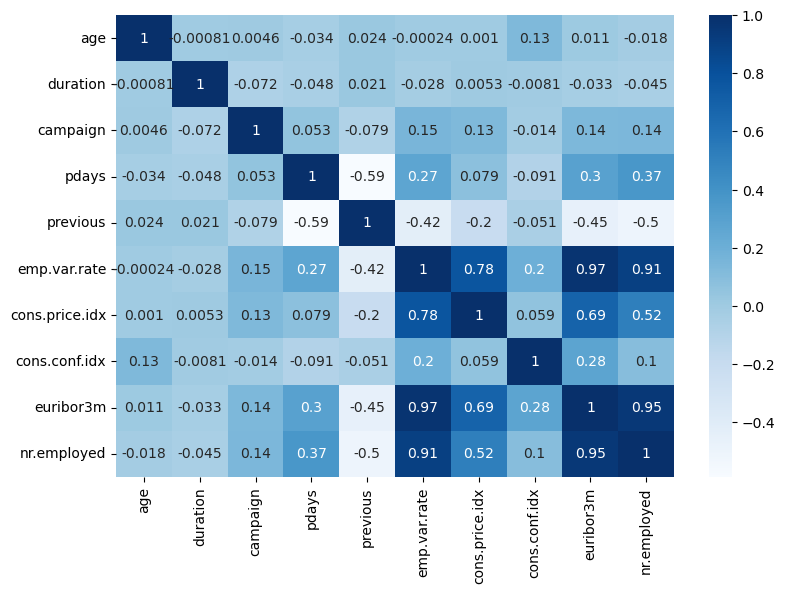

In [29]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True)
plt.savefig('Outputs/feature_correlation.png')
plt.show()

##### Observation
- Strong positive correlations are observed among economic variables such as emp.var.rate, euribor3m, and nr.employed, indicating they move together. Most customer-related features like age, campaign count, and previous contacts show weak correlation with each other.
##### Insights
- The presence of high correlation among economic indicators suggests potential multicollinearity, which should be considered when using linear models, while tree-based models can handle this effectively.

### Final Exploratory Data Analysis Summary
•	The dataset contains 41,188 customer records and 21 features, including demographic, financial, campaign interaction, and macroeconomic indicators.
•	The target variable y (term deposit subscription) is highly imbalanced, with ~11% positive and ~89% negative outcomes.
•	No missing values were found; however, several categorical variables contain ‘unknown’ values, which are treated as valid categories.
•	Duplicate records (12 rows) were identified and removed to maintain data quality.
•	Customer demographics such as age, job, marital status, and education show noticeable differences in subscription behavior.
•	Campaign interaction variables (contact type, month, duration, number of calls) strongly influence subscription outcomes.
•	Previous campaign history (pdays, previous contacts, poutcome) is a strong predictor of customer response.
•	Macroeconomic indicators (employment rate, Euribor rate, consumer confidence) significantly impact customer willingness to subscribe.
•	High correlation exists among economic variables (emp.var.rate, euribor3m, nr.employed), indicating potential multicollinearity for linear models.

### Final Business Insights
#### Key Business Insights
##### Customer Profile
- Customers aged 30–40 years show the highest subscription rates, making them a high-value target segment.
- Customers with higher education levels (university degree, professional courses) are more likely to subscribe.
- Single customers show a higher response rate compared to married and divorced customers.
- Customers without credit default history and without personal loans are significantly more likely to subscribe.
##### Campaign Strategy
- Cellular contact is far more effective than telephone calls and should be prioritized.
- Subscription success depends more on timing than call volume:
- Higher conversion months: March, April, September, October
- Early contact attempts (1–3 calls) are most effective.
- Repeated calls reduce success and increase campaign cost.
- Call duration is strongly associated with subscription, but it causes data leakage and should be excluded from predictive models.
##### Previous Campaign Impact
- Customers who subscribed in previous campaigns have a very high probability of subscribing again.
- Previously contacted customers perform better than first-time contacts.
- Simplifying pdays into a binary feature (previously contacted or not) improves interpretability and model performance.
##### Economic Conditions
- Customers are more likely to subscribe during:
- - Low interest rate periods
  - Higher consumer confidence
  - Economic uncertainty, where safer investments like term deposits are preferred
  - Marketing campaigns should be aligned with favorable economic indicators to maximize conversions.



### 4. Data Preprocessing

### 4.1 Handle Unknown values 

Several categorical variables contain missing values encoded as "unknown". Since these values represent unavailable customer information rather than data errors, they were retained as a separate category and encoded accordingly to preserve their predictive information.

### 4.2 Feature Engineering

#### Feature engineering decision after Observing EDA

##### pdays
- A binary feature prevously contacted will be created, value 0 means customer was not contacted(pdays equal 999) and value 1 means customer prevously contacted(pdays not equal to 999).

In [30]:
df['previously_contacted'] = np.where(df['pdays']==999,0,1).astype('int')

In [31]:
df.drop(columns='pdays',inplace=True)

The pdays variable contains a special value (999) indicating that the client was not contacted in a previous campaign. Since most observations fall under this category and the exact number of days is less informative, a binary feature previously_contacted was created to represent whether the client had prior contact history. After feature creation, the original pdays column was removed to avoid distortion caused by the placeholder value.

##### Compaign
- Campaign has very large values, so they will be treated as outliers.
- Limit (cap) high values to avoid model bias.
- A new feature will be created:
- - 0 - Low contact (1–3 calls)
- - 1 - High contact (>3 calls)
- This makes the data cleaner and easier for the model to learn.

In [39]:
df['campaign'] = np.where(df['campaign']<=3,0,1).astype(int)

##### Drop data leakage column

In [33]:
df.drop(columns='duration',inplace=True)

The duration variable was removed from the dataset to prevent data leakage, as call duration is only known after the call is completed and would not be available at prediction time.

#### Target and Predictor seperator

In [51]:
X = df.drop(columns='y')
y = df.y

##### Train Test Split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Creating Column Transformer

In [46]:
cat_col = X.select_dtypes(include=['object','category']).columns
num_col_std = ['emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed']
# these num_col_enc has no outliers and it needs scaling. we use standard scaler. Robust scaler will be applied to age column which has outliers

In [47]:
preprocessor = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),cat_col),
    ('rs',RobustScaler(),['age']),
    ('ssc',StandardScaler(),num_col_std)
])

### 5. Logistic Regression

In [64]:
# Creating pipeline for logistic regression
pipeline_lr = Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42))
])

In [58]:
pipeline_lr.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                 ('rs', RobustScaler(),
                                                  ['age']),
                                                 ('ssc', StandardScaler(),
                                                  ['emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [61]:
## model prediction
y_pred_lr = pipeline_lr.predict(X_test)
y_prob_lr = pipeline_lr.predict_proba(X_test)[:,1]

In [72]:
## model evaluation
print(classification_report(y_test,y_pred_lr),'\n')
print('ROC-AUC',roc_auc_score(y_test,y_prob_lr))

              precision    recall  f1-score   support

          no       0.94      0.85      0.89      7265
         yes       0.35      0.63      0.45       971

    accuracy                           0.82      8236
   macro avg       0.65      0.74      0.67      8236
weighted avg       0.87      0.82      0.84      8236
 

ROC-AUC 0.7912297650445153


#### Model Insights
- The model performs very well for the majority class (no) but moderately for the minority class (yes).
- Recall for “yes” is reasonably high (0.63), meaning the model can identify many potential subscribers.
- Precision for “yes” is low (0.35), indicating more false positives.
- Since the dataset is highly imbalanced, accuracy (0.82) can be misleading, so F1-score and ROC-AUC (0.79) are more reliable performance indicators.

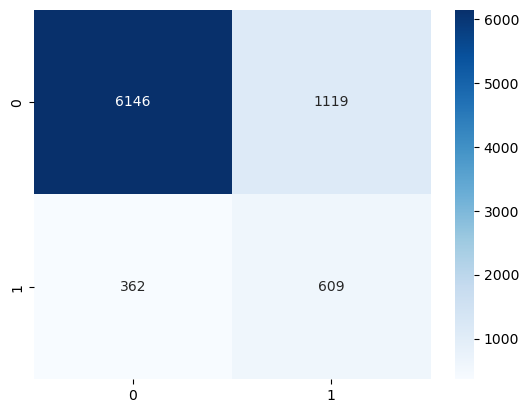

In [70]:
sns.heatmap(confusion_matrix(y_test,y_pred_lr),cmap='Blues',annot=True, fmt='d')
plt.show()

##### insights
- The model correctly identifies most non-subscribers.
- It captures many actual subscribers but still misses some.
- There are false positives, meaning extra customers may be contacted.
- Overall, it is useful for marketing, where finding potential subscribers is the priority.

In [ ]:
# Creating pipeline for 